In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [6]:
train['type']='train'
test['type']='test'

In [7]:
data=pd.concat([train,test],ignore_index=True)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
type           1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [9]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
type              0
dtype: int64

In [10]:
print(data['Sex'].unique())
print(data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q' nan]


In [11]:
data['Embarked'].mode()

0    S
dtype: object

In [12]:
data['Embarked'].fillna('S',inplace=True)

In [13]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
type              0
dtype: int64

In [14]:
data.drop('Cabin',axis=1,inplace=True)

In [15]:
age_med=data['Age'].median()
data['Age']=data['Age'].fillna(age_med)

In [16]:
data.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
type             0
dtype: int64

In [17]:
data['Fare']=data['Fare'].fillna(method='ffill')

In [18]:
data.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
type             0
dtype: int64

In [19]:
data.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [20]:
data.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'type'],
      dtype='object')

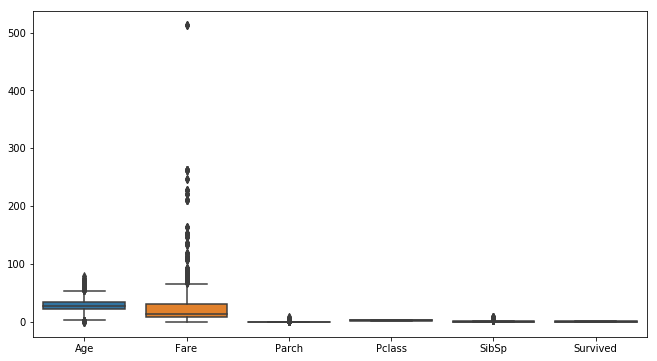

In [21]:
plt.figure(figsize=(11,6))
sns.boxplot(data=data)

In [22]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
data1=pd.DataFrame(sl.fit_transform(data[['Age','Parch','SibSp','Fare']]),columns=['Age','Parch','SibSp','Fare'])
data['Age']=data1['Age']
data['Parch']=data1['Parch']
data['SibSp']=data1['SibSp']
data['Fare']=data1['Fare']
a=np.array(data['Age'])
cbt=np.cbrt(a)
data['Age']=pd.DataFrame(cbt)
b=np.array(data['Parch'])
cbt1=np.cbrt(b)
data['Parch']=pd.DataFrame(cbt1)
c=np.array(data['SibSp'])
cbt2=np.cbrt(c)
data['SibSp']=pd.DataFrame(cbt2)
d=np.array(data['Fare'])
cbt3=np.cbrt(d)
data['Fare']=pd.DataFrame(cbt3)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
data.columns

Index(['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp',
       'Survived', 'type'],
      dtype='object')

In [24]:
data=pd.get_dummies(data,columns=['Embarked', 'Sex'])

In [25]:
data.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,type,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,-0.834735,-0.795376,-0.76346,3,0.783673,0.0,train,0,0,1,0,1
1,0.870066,0.902385,-0.76346,1,0.783673,1.0,train,1,0,0,1,0
2,-0.647571,-0.788440,-0.76346,3,-0.782477,1.0,train,0,0,1,1,0
3,0.752495,0.726384,-0.76346,1,0.783673,1.0,train,0,0,1,1,0
4,0.752495,-0.787142,-0.76346,3,-0.782477,0.0,train,0,0,1,0,1


In [26]:
train = data.loc[data['type']=="train"]
test = data.loc[data['type']=="test"]

In [27]:
train.drop(['type'],axis=1,inplace=True)
test.drop(['type','Survived'],axis=1,inplace=True)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
X_train=train.drop('Survived',axis=1)
Y_train=train['Survived']
X_test=test

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
# Predicted class
Y_predf=neigh.predict(X_test)
print(Y_predf)
# 3 nearest neighbors
print(neigh.kneighbors(X_test)[1])


[0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
model=classifier.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [32]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier

classifier1=ExtraTreesClassifier()
classifier1.fit(X_train,Y_train)
Y_pred1=classifier1.predict(X_test)

C:\Users\adity\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [33]:
classifier1.score(X_train,Y_train)

0.9797979797979798

In [ ]:
model.score(X_train,Y_train)

In [34]:
test=pd.read_csv('test.csv')
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
a=Y_pred1
b=a.astype(int)

In [ ]:
res=pd.read_csv('gender_submission.csv')

In [37]:
df=pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':b})
df.to_csv('submission3.csv',index=False)

In [ ]:
df=pd.DataFrame({'PassengerId':res['PassengerId'],'Survived':res['Survived']})

In [ ]:
df.head()

In [ ]:
df.to_csv('submission2.csv',index=False)